In [1]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr   
import matplotlib.pyplot as plt
from scipy.stats import zscore
import csv
from TCGA_code import match_computation as m


The software takes in two input gene expression files and analyzes how the gene samples relate to each other.

The goal is to check if an (input) gene profile shows similiarity with known cancer gene profiles. 

1. Load in data
2. Pre-Process data
3. Compute expression level analysis


In [2]:
# 1. Load in data from input files. The files are expected to be in the following format: 
# columns: [symbol, value]
# row: genes


file_name = "kidney_cancer_GEP.csv" 
#file_name = "Kidney_tumor_B0_4712.csv"
profile_df = m.read_expr_profile(file_name)

file_name = "breast_cancer_GEP.csv" 
#file_name = "kidney_2_cancer_GEP.csv"
#file_name = "Kidney_tumor_2.csv"
#file_name = "Breast_tumor.csv"
#file_name = "Kidney_tumor_1.csv"
#file_name = "Kidney_normal_B0_4712.csv"
TCGA_df = m.read_TCGA_sample(file_name)



In [3]:
# 2. Process the data - Make them be the same length by either removing missing information or adding 
#    zero expression values. These functions check both input data files both ways.

profile, sample, missing_TCGA = m.check_TCGA(profile_df, TCGA_df, add_missing = True, output = False)
profile, sample, missing_reference = m.check_profile(profile, sample, add_missing = True, output = False)


In [4]:
# 3. Normalize expression levels
profile = m.normalize_profile(profile, "mean")
sample = m.normalize_profile(sample, "mean")


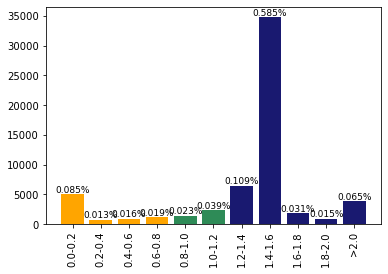

The input expression levels show a correlation value of: 0.5271
Genes that are missing in the reference profile are:
 []
Genes that are missing in the TCGA profile are:
 []


In [5]:
# 4. Data Analysis and evaluation:
gene_ratio, similiar_genes = m.expression_analysis(profile, sample)

# Bar chart Visualization
m.gene_bar_chart(gene_ratio, show = "percentage")

# Expression values correlation
distance = m.compute_distance(profile, sample)

print("The input expression levels show a correlation value of:", distance)
print("Genes that are missing in the reference profile are:\n", missing_TCGA)
print("Genes that are missing in the TCGA profile are:\n", missing_reference)


In [6]:
# File Output:

path = "/Users/jenniliu/Desktop/BIOINF576/TCGA_Matchmaker/TCGA_code/real_dataset_tutorial/Missing_Genes.csv"
with open(path, 'w+', newline = '') as csvfile:
    my_writer = csv.writer(csvfile, delimiter = ' ')
    text = ""
    text += "Missing Genes reference profile are:\n" #+ missing_TCGA
    for gene in missing_reference:
        text += f"\n{gene}"

    text += "\nMissing Genes TCGA profile are:\n" #+ missing_reference
    for gene in missing_TCGA:
        text += f"\n{gene}"

    my_writer.writerow(text)
    

In [7]:
path = "/Users/jenniliu/Desktop/BIOINF576/TCGA_Matchmaker/TCGA_code/real_dataset_tutorial/Similiar_Genes.csv"
with open(path, 'w+', newline = '') as csvfile:
    my_writer = csv.writer(csvfile, delimiter = ' ')
    my_writer.writerow("Similiar_Genes")
    text = ""
    for gene in similiar_genes:
        idx = int(gene)
        text += f"\n{sample.iloc[idx,0]}"
    my_writer.writerow(text)

    